In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [61]:
os.chdir("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets")
a=pd.read_csv("mpg.csv")
a.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [62]:
a.drop(["manufacturer","manufacturer","model","displ","year","cyl","trans","drv","fl","class"],axis=1,inplace=True)

In [63]:
a.head()

,Unnamed: 0,cty,hwy
0,1,18,29
1,2,21,29
2,3,20,31
3,4,21,30
4,5,16,26


In [64]:
a.drop(["Unnamed: 0"],axis=1,inplace=True)

In [65]:
a.head()

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26


In [66]:
km=KMeans(n_clusters=4)
km.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
pred=km.predict(a[["cty","hwy"]])
pred

array([3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 3, 3, 3, 3, 2, 2, 2, 3, 1, 1,
       3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 2, 2, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 3, 3, 1, 2, 3, 1, 3, 3, 3, 3, 1,
       1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1])

In [68]:
a["clusters"]=pred
a.head()

,cty,hwy,clusters
0,18,29,3
1,21,29,3
2,20,31,3
3,21,30,3
4,16,26,1


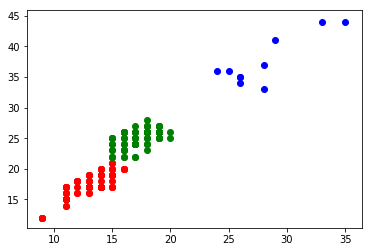

In [69]:
b=a[a.clusters==0]
c=a[a.clusters==1]
d=a[a.clusters==2]
plt.scatter(b["cty"],b["hwy"],color="red")
plt.scatter(c["cty"],c["hwy"],color="green")
plt.scatter(d["cty"],d["hwy"],color="blue")

In [70]:
d=[]
k=range(1,10)
for i in k :
    m=KMeans(n_clusters=i)
    m.fit(a)
    d.append(m.inertia_)

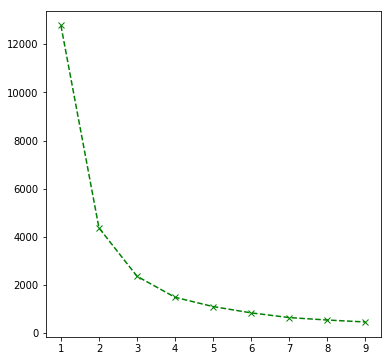

In [71]:
plt.figure(figsize=(6,6))
plt.plot(k,d,"gx--")
plt.show()